# Project 3: Solving Differential Equations in Python

## 1. Introduction
### 1.1 Electrical Resistivity in Petroleum Engineering
To properly analyze reservoir characteristics and predict future production behavior, engineers require reliable information about the in situ properties of the reservoir. Petrophysical properties such as permeability, porosity, and fluid saturation are important factors in estimating the amount of hydrocarbon in place and the mechanics of fluid flow through porous media.

Since the very first well log in 1927, electrical resistivity has been used for determining in situ petrophysical properties of a reservoir. Electrical resistivity is a fundamental property of a material that quantifies how strongly it resists electric current. Low resistivity means that a material will readily allow current to flow. In 1942, Gus Archie developed an empirical relationship between electrical resistivity and the brine saturation. Today, electrical logs are commonly used in conjunction with Archie's law and other resistivity models to delineate brine and hydrocarbon saturation in reservoir rock.

Current researchers (including Bernie and Dr. Prodanovic) are trying to replicate experimentally-determined electrical properties using numerical simulation. One important component of doing so is calculating the electric potential field. The electric potential is the difference in potential energy (i.e., the energy needed to move a charge against an electric field) per unit charge between two locations in an electric field. By finding the potential field, we can calculate the average current in each direction, which is directly related to resistivity by Ohm's law.

### 1.2 Introduction to Capacitors
Capacitors (shown in the figure below) are devices that store electrostatic energy in an electric field. The form of capacitors vary widely but they all consist of at least two electrical conductors (in the form of plates) separated by a dielectric medium. When we apply a potential (voltage) difference across the conductors, an electric field develops across the dielectric causing positive charges to collect at one plate and negative charges to collect on the other. 

<div>
<img src='images/350_inline_capacitors.png', width='250'/>
</div>

Capacitors are widely used for sensors and signal processing. They are also extremely common in our everyday electronics — everything from microwaves to the DRAM in your computer to the accelerometer that controls the airbag in your car uses capacitors! 

In this project, we will be studying the simplest form of capacitor – the parallel plate capacitor. We will numerically calculate the potential and electric fields between parallel plate capacitors in a domain of uniform conductivity. In porous media, a non-uniform conductive field adds a layer of complexity that is outside the scope of this class.

**Before we begin**, import the Numpy, Matplotlib and Timeit libraries:

In [1]:
# Import numpy, matplotlib.pyplot and timeit
import numpy as np
import matplotlib.pyplot as plt
import timeit

### 1.3 Vectorized Programming
Though it is possible to complete this project using a series of nested loops, they can become quite complicated and computationally demanding. An alternative is to use *vectorized* programming.

Vectorization is used to speed up code by working with arrays without using loops. This can help the code run much more efficiently and is oftentimes cleaner to read. In vectorized codes, operations are performed on multiple components of a vector at the same time in a single statement. Rather than looping through each element in an array, we can reference any element we want simultaneously using the indexing and slicing techniques that we've already learned.

Take the following example. Say we have 2 500x500 Numpy arrays filled with random values and we wanted to add the first 497 rows of each together. Note that we can do this in a single line using vectorized programming and it calculates the result much faster than using a loop.

In [2]:
np.random.seed(0)
# Create 2 5x5 Numpy arrays 
A = np.random.randint(1,10,(500,500))
B = np.random.randint(1,10,(500,500))
print(f'A = \n {A} \n')
print(f'B = \n {B} \n')
tic = timeit.default_timer()

# Using nested for loops to add each element of first 4 rows
C_loop = np.zeros((497,500))
for i in range(497):
    for j in range(500):
        C_loop[i,j] = A[i,j] + B[i,j]

toc1 = timeit.default_timer()
print(f'C_loop = \n {C_loop} \n Calculation time = {(toc1-tic)} s \n\n')


# Using vectorized programming to add each element of first 47 rows
C_vectorized = A[:497] + B[:497]
toc2 = timeit.default_timer()
print(f'C_vectorized = \n {C_vectorized} \n Calculation time = {(toc2-toc1)} s')


A = 
 [[6 1 4 ... 7 1 8]
 [6 2 6 ... 4 5 4]
 [7 5 3 ... 2 1 7]
 ...
 [9 3 5 ... 2 9 6]
 [2 9 4 ... 6 5 2]
 [4 3 4 ... 1 3 6]] 

B = 
 [[5 4 2 ... 1 4 8]
 [1 6 4 ... 5 9 3]
 [8 8 3 ... 6 4 7]
 ...
 [9 8 1 ... 9 9 4]
 [1 4 7 ... 4 9 7]
 [9 3 7 ... 2 5 8]] 

C_loop = 
 [[11.  5.  6. ...  8.  5. 16.]
 [ 7.  8. 10. ...  9. 14.  7.]
 [15. 13.  6. ...  8.  5. 14.]
 ...
 [ 6. 12.  5. ...  6. 18. 14.]
 [ 6. 10. 12. ... 13. 11. 11.]
 [ 9.  6.  2. ... 10.  7. 17.]] 
 Calculation time = 0.5757724000000053 s 


C_vectorized = 
 [[11  5  6 ...  8  5 16]
 [ 7  8 10 ...  9 14  7]
 [15 13  6 ...  8  5 14]
 ...
 [ 6 12  5 ...  6 18 14]
 [ 6 10 12 ... 13 11 11]
 [ 9  6  2 ... 10  7 17]] 
 Calculation time = 0.013246799999990344 s


## 2. Potential Field around a Capacitor
For our model, we will calculate the potential and electric fields in the region between and around the two parallel capacitor plates shown below: 

<div>
<img src='images/Capacitors.png', width='350'/>
</div>

The domain size is 50x50 with 50 points in each direction.

### 2.1 Initializing the Domain
Initialize the potential ($\phi$) field by creating a Numpy array of size 50x50 filled with zeros (Hint: use the np.zeros() function)

Both plates are of length 25 and width 1.
The center of the left plate has position $\left(\frac{x}{3}, \frac{y}{2}\right)$
The center of the right plate has position $\left(\frac{2x}{3}, \frac{y}{2}\right)$ <br>
(*Hint:* Be careful! Remember that Python indices first reference the row, then the column, meaning the x- and y-coordinates need to be switched!)

Label  $\phi_{\text{plate,left}} = 1$ and $\phi_{\text{plate,right}} = -1$.

Use the *plt.imshow()* function to plot the initial potential distribution. Be sure to include a colorbar and an appropriate title.

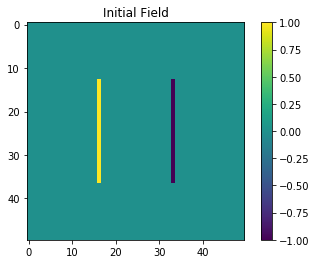

In [4]:
# Function to initialize the potential field
# Inputs:
#    x = Dimension in x
#    y = Dimension in y
#    n = Number of points in each direction
# Outputs:
#    phi = Initial potential field

def initialize_field(x,y,n):
    #Initialize the background potential to zeros
    # Use the np.zeros() function
    phi = np.zeros((x,y))
    # Assign potentials to each plate location
    phi[int(y/2) - int(n/4):int(y/2) + int(n/4), int(x/3)] = 1
    phi[int(y/2) - int(n/4):int(y/2) + int(n/4), int(2*x/3)] = -1
    return phi
   


#Ploat the initial potential distribution
phi = initialize_field(50,50,50)
plt.imshow(phi)
plt.title('Initial Field')
plt.colorbar()


### 2.2 Solving for the Potential Field
To find the potential distribution, we need to solve the 2D Laplace equation for the electric potential in a uniform conductive field. We build a numerical model by the finite difference method.

#### 2.2.1 General Equation
The general equation we will use to find the potential distribution is known as the Laplace equation:

$$
\nabla\cdot(\nabla\phi) = \nabla^2\phi = 0
$$

where $\phi$ is the electric potential. The Laplace equation is also used in many fluid flow and heat transfer applications. 

In 2D Cartesian space, the Laplace equation is expressed as:

$$
\frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = 0
$$

Because the Laplace equation is a second-order partial differential equation in two dimensions, four boundary conditions are required to obtain a solution. We set $\phi$ at each of the boundaries to 0. Imposing a specific value that a solution takes along the boundary of a domain is called a Dirichlet boundary condition. Mathematically, the boundary conditions are as follows:

$$
\phi(x_{min}, y) = \phi(x_{max}, y) = \phi(x, y_{min}) = \phi(x, y_{max}) = 0
$$

#### 2.2.2 Numerical Methods and Discretization
There are very few examples of electrostatic problems that can be solved analytically. Fortunately, we've learned all the tools we need to solve this problem using a computer!

We have already created a rectangular grid to sample the electric potential in 2D space. Now, we must discretize the 2D Cartesian form of the Laplace equation and solve it using one of the iterative methods we have covered in class. 

To discretize the Laplace equation, we need to approximate the second derivatives by central difference quotients that are second order accurate:

$$
\frac{\partial^2\phi}{\partial x^2} = \frac{\phi(x+\Delta x,y) - 2\phi(x,y) + \phi(x-\Delta x, y)}{\Delta x^2}\\
\frac{\partial^2\phi}{\partial y^2} = \frac{\phi(x,y+\Delta y) - 2\phi(x,y) + \phi(x, y-\Delta y)}{\Delta y^2}\\
$$

If we choose $\Delta x = \Delta y$ and combine the two equations, we obtain:

$$
\frac{\partial^2\phi}{\partial x^2} + \frac{\partial^2\phi}{\partial y^2} = \phi(x+\Delta x,y) + \phi(x-\Delta x, y) + \phi(x,y+\Delta y) + \phi(x, y-\Delta y) - 4\phi(x,y) = 0 
$$

$$
\phi(x,y) = \frac{1}{4}(\phi(x+\Delta x,y) + \phi(x-\Delta x, y) + \phi(x,y+\Delta y) + \phi(x, y-\Delta y))
$$


Note that this is equivalent to saying that the value of the electric potential at any point is simply the average of its four surrounding neighbors!

The discrete Laplace equation can be rewritten according to the notation of the following finite difference stencil:

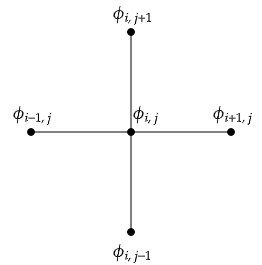

This takes the form:
$$
\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1} - 4\phi_{i,j} = 0
$$

For each discretized point, the potentials need to satisfy the above equation. Because the potential at each point depends on its neighbors, we end up with a system of algebraic equations. In class, we have shown that we can represent systems of linear algebraic equations in matrix-vector form (**Ax** = **b**). The matrix-vector format is essential if using a direct linear equation solver, such as Gaussian elimination or LU decomposition.

As a simple example of how to set up the coefficients matrix, consider the following gridded domain:

<div>
<img src='images/Linearize2D.png', width='250'/>
</div>

If we want to solve for the electric potential according to the discretized Laplace equation, our coefficient matrix is pentadiagonal and would be constructed as follows:

<div>
<img src='images/DiscretePoisson2.png', width='250'/>
</div>

Coefficient values of 0 are omitted. Here we are only solving for the interior points in the domain, because values at the boundary are known. If you choose to construct the coefficient matrix as we have done in class, be sure to account for the points corresponding to the plates. These are known values and should be held constant. 

For larger systems, iterative methods are generally more efficient and do not require constructing a coefficient matrix. Generally, we try to avoid explicitly constructing the coefficient matrix as it can become quite complicated and computationally expensive. 

Here, we propose one way of implementing the Jacobi method to solve the system by directly referencing and updating each point on the grid. You may also choose to try constructing the coefficients matrix for the above system of equations and solving it using any of the iterative methods developed in class. Keep in mind that the methods shown in class are relatively slow and may require significantly longer run times.

### 2.3 Non-vectorized Algorithm

Here we present one algorithm that calculates the potential field without using vectorization. This is just one of many possible implementations. You may choose to follow this or any other method we have covered in class.

 1. Create an outer loop that iteratively solves the discretized Laplace equation until the Frobenius norm falls below 1e-5 or until it reaches 5000 iterations. Recall that the Frobenius norm is defined as: 

$$
\|A\| = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}\left|(a_{new} - a_{old})_{ij}\right|}
$$


 2. Within the outer loop, construct a set of nested loops to iterate through each interior point in the domain ($i=[1, x-1]$ and $j=[1, y-1]$) and update $\phi_{i,j}$ according to the final discretized form of the Laplace equation. Assume $\Delta x = \Delta y = 1$.
 
 
 3. We want to keep the potential at the plates constant. Typically, we would exclude these points from calculation because they are known quantities. However, for simplicity, we will simply "reset" $\phi$ at each plate to their respective values after each iteration. 
 
 Because we only update $\phi$ values in the interior, the Dirichlet boundary conditions are automatically maintained. 


 4. Calculate the Frobenius norm. You may use the *numpy.linalg.norm()* function (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

Use the *timeit.default_timer()* function to find and print the calculation time. Refer to https://www.educative.io/edpresso/what-is-the-python-timeit-module for more information.



In [5]:
# Function to calculate the potential field using nested for-loops
# The comments within the function are for the algorithm outline above. If you choose a different method, simply ignore the comments.
# Inputs:
#     phi = Initial potential field
#     maxIter = Maximum number of iterations before exiting loop. Default = 5000
# Outputs:
#     phi = Final potential field

def phi_nonvectorized(phi, maxIter=5000):
    
    # Find the shape of phi
    m,n = np.shape(phi)
    # Initialize error and iteration
    err = 1
    iter = 0
    
    # Get start value of time
    tb = timeit.default_timer()
    
    # Construct a loop to calculate the potential distribution until the error < 0.00001
    while err >= .00001 and iter <= maxIter:
        
        # Use the np.copy() function to make a copy of the current phi matrix
        # This will serve as phi_old when calculating the Frobenius norm
        phi_old = np.copy(phi)
        
        # Construct nested loops to iterate through and update all interior values of phi
        for i in range(1,m-1):
            for j in range(1,n-1):
                 
                
                # Update each value of phi using the copied 
                phi[i,j] = (.25)*(phi_old[i,j+1]+phi_old[i,j-1]+phi_old[i+1,j]+phi_old[i-1,j])
                
        # Manually "reset" the potentials at each plate after every iteration
        phi[int(n/4):int(3*(n/4)), int(m/3)] = 1                                           # Left parallel plate capacitor
        phi[int(n/4):int(3*(n/4)), int(2*(m/3))] = -1                                      # Right parallel plate capacitor
        
        # Calculate the error, use L2 norm
        err = np.linalg.norm(phi-phi_old)
        iter += 1

        
        
    # Get end value of time
    tf = timeit.default_timer()
    
    # Print the difference between stop and start times to get the process time.
    timing = (tf)- (tb)
    print("Time in seconds:", timing)
    
    return phi, timing


Create a filled contour plot of the final potential field. Use the *plt.contourf()* function with 50 levels. For more information about the filled contour function, refer to the Matplotlib documentation: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.contourf.html

Include a colorbar and an appropriate title.

**Important note:** Be sure to call the *initialize_field()* function before calculating the final potential field.

Time in seconds: 8.102927000000022


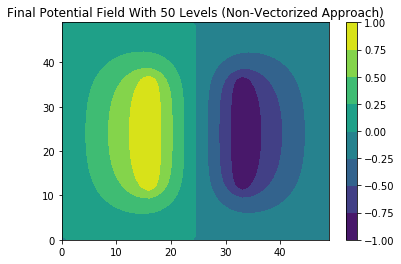

In [7]:
# Initialize field by calling the initialize_field() function
phi_v = initialize_field(50,50,50)

# Calculate the potential field by calling the phi_nonvectorized() function
phi, timing = phi_nonvectorized(phi_v)

# Create a contour plot of the final potential field
plt.contourf(phi)
plt.title("Final Potential Field With 50 Levels (Non-Vectorized Approach)")
plt.colorbar()

Plot the potential profile between the parallel plates along the line $y=25$. Include appropriate axis labels

Text(0, 0.5, 'Potential Value')

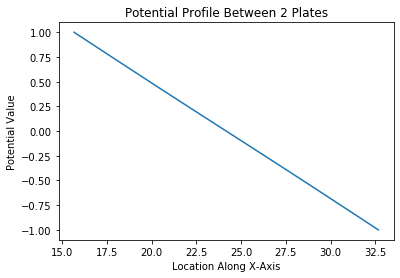

In [8]:
# Create an array of points from 47/3 to 100/3 (locations of the plates) with step size of 1 
x_plot = np.arange(47/3, 100/3, 1)

# Extract the values of phi along row index 25 and between column indices 16 and 33, inclusive
y_plot = phi[25, 16:34]

# Plot the potential profile between the parallel plates
plt.plot(x_plot, y_plot)
plt.title('Potential Profile Between 2 Plates')
plt.xlabel('Location Along X-Axis')
plt.ylabel('Potential Value')

### 2.4 Vectorized Algorithm

Vectorization converts an algorithm from operating on a single value at a time to operating on an entire set of values at one time. If we slightly modify the implementation of the proposed algorithm, we can obtain the same final solution in a fraction of the time. Vectorization works by referencing the interior points and their neighbors using slicing techniques we have learned in class. Instead of indexing each point individually using nested loops, think about how you would slice the phi matrix to extract the subset of its elements that correspond to the interior points (i.e., referencing all points except those on the the 0th and last column/row). Similarly, slice the phi matrix to obtain a subset of the left, right, top and bottom neighbors.

Begin by creating an outer loop that iteratively solves the discretized Laplace equation until the Frobenius norm falls below 1e-5 or until it reaches 5000 iterations.

Inside the loop, update $\phi_{i,j}$ according to the final discretized form of the Laplace equation using a vectorized approach (i.e., **without** using for-loops). Assume $\Delta x = \Delta y = 1$.

Again, manually "reset" $\phi$ at each plate to their respective values between each iteration.

Print the total calculation time. Report the difference in calculation time between the vectorized and non-vectorized program. While the difference in this problem may seem small, the speed-up in run time can become significant when dealing with larger and more complex problems. 

If you're curious, try initializing the potential field to a 100x100 domain. Calculate the potential field using both the vectorized and nonvectorized functions and note the difference in calculation time. You may need more than 5000 iterations to do so.


In [9]:
def phi_vectorized(phi, maxIter=5000):
    
    # Get the shape of phi
    m,n = np.shape(phi)
    
    # Initialize error and iteration
    iter = 0
    err = 1
     
    # Get start value of time
    tb = timeit.default_timer()
    
    # Construct a loop to calculate the potential distribution until the error < 1e-5 or iteration > 5000
    while err >= .00001 and iter <= maxIter:
        # Create a copy of phi. This will be used to calculate the error
        phi_old = np.copy(phi)
        
        
        # Update values of phi for all interior cells. Use a vectorized approach. DO NOT use for-loops
        phi[1:n-1, 1:n-1] = (.25)*(phi_old[1:n-1, 2:n] + phi_old[1:n-1, 0:n-2] + phi_old[2:n, 1:n-1] + phi_old[0:n-2, 1:n-1])
                                  
    
        # Reset the potential values at the plates
        phi[int(n/4):int(3*(n/4)), int(m/3)] = 1                       # Left parallel plate capacitor
        phi[int(n/4):int(3*(n/4)), int(2*(m/3))] = -1                  # Right parallel plate capacitor
        
        # Calculate the Frobenius norm
        error = np.linalg.norm(phi-phi_old)
        iter += 1

        
        
    # Get end value of time
    tf = timeit.default_timer()
    
    # Print the difference between stop and start times to get the process time.
    timing = (tf)- (tb)
    print("Time in seconds:", timing)
    
    return phi, timing


Create a filled contour plot of the final potential distribution with 50 levels.

**Important note:** Be sure to reinitialize the field before calculating the final potential field.

Time in seconds: 0.7821888000000001


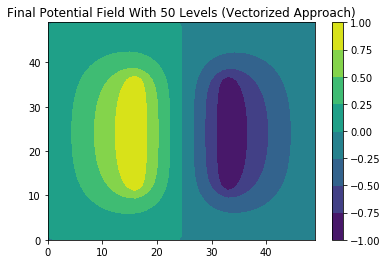

In [10]:
# Initialize field by calling the initialize_field() function
phi_v = initialize_field(50,50,50)

# Calculate the potential field by calling the vectorized() function
phi, timing = phi_vectorized(phi_v)

# Create a contour plot of the final potential field. 
plt.contourf(phi)
plt.title("Final Potential Field With 50 Levels (Vectorized Approach)")
plt.colorbar()



### 2.5 Answer the following questions

Estimate the slope of the potential profile between the parallel plates.

    

Report the %-difference in run time between the vectorized and non-vectorized approaches

    

The approximate slope is -.12. The percent difference in timing is 935.93%

## 3. Electric Field around a Capacitor
After solving for the potential field, we can find the electric field by simply taking the gradient $E = -\nabla\phi$.

In 2D, this is equivalent to:

$$
\textbf{E} = (E_x, E_y) = \left(-\frac{\partial\phi}{\partial x}, -\frac{\partial\phi}{\partial y}\right)
$$

Note that taking the gradient results in a vector quantity. 

### 3.1 Discrete Gradient
All that is needed to find the components of the electric field are the partial derivatives of the electric potential. As before, this can be done by the central difference method in two directions:

$$
\frac{\partial\phi}{\partial x} \approx \frac{\phi_{i+1,j} - \phi_{i-1,j}}{2\Delta x} \\
\frac{\partial\phi}{\partial y} \approx \frac{\phi_{i,j+1} - \phi_{i,j-1}}{2\Delta y}
$$

In the following function, calculate the components of the electric field for all interior points. Assume $\Delta x = \Delta y = 1$. Ignore the values at the boundaries, these can be set to 0. 



In [11]:
# Function that calculates the x- and y-components of the electric field
# Inputs:
#     phi = Final potential distribution
# Outputs:
#     Ex = x-components of electric field
#     Ey = y-components of electric field

def EField(phi):
    # Get the shape of phi
    s = np.shape(phi)
    
    # Initialize x-component of the electric field
    # Create a 2D array with the same shape as phi, filled with zeros
    Ex = np.zeros(s)
    
    # Calculate the discrete derivative of phi in the x direction
    for i in range(1,s[0]-1):
        for j in range(1,s[1]-1):
            Ex[i,j] = -(phi[i,j+1]-phi[i,j-1])/2
    
    
    # Initialize y-component of the electric field
    # Create a 2D array with the same shape as phi, filled with zeros.
    Ey = np.zeros(s)
    
    # Calculate the discrete derivative of phi in the y direction
    for i in range(1,s[0]-1):
        for j in range(1,s[1]-1):
            Ey[i,j] = -(phi[i+1,j]-phi[i-1,j])/2
    
    return Ex, Ey

### 3.2 Plot the Electric Field
Call the **Efield()** function you just wrote to calculate the components of the electric field. 

Calculate the magnitude of the electric field at each point. The magnitude of the electric field is defined as:
$$
\| E \| = \sqrt{E_x^2 + E_y^2}
$$

Create a filled contour plot of the magnitude of the electric field. Use the *plt.contourf()* function with 50 levels. Be sure to include a colorbar.

On the same figure, plot the electric field lines with the *plt.streamplot()* function you used in Project 1 (https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.streamplot.html). 
Specify density=1.25 and set the arrow color to black. 

Label your plot with an appropriate title.

Text(0.5, 1.0, 'Showing Electric Field Direction In A Capacitor')

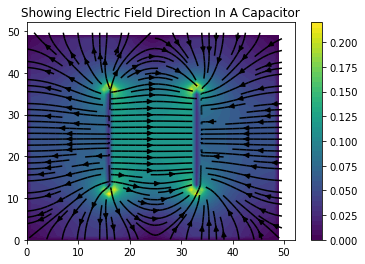

In [13]:
# Call the function to calculate the electric field components
Ex, Ey = EField(phi)
# Calculate the magnitude of the electric field
magE = np.sqrt((Ex**2)+(Ey**2))

# Create a meshgrid
x = np.linspace(0,len(phi[0]),len(phi[0]))
y = np.linspace(0,len(phi[:,0]),len(phi[:,0]))

# Create a filled contour plot of the electric field magnitude
plt.contourf(magE,EField(phi),levels=50)
plt.colorbar()

# On the same figure, plot the electric field lines using the plt.streamplot() function
plt.streamplot(x,y,Ex,Ey,density=1.25,color='black')
plt.title('Showing Electric Field Direction In A Capacitor')

### 3.3 Answer the following questions

What do you notice about the electric field between the parallel plates? Does this make sense given the solution to the potential field?

    
    
What is the magnitude of the electric field at the point (25,25)? How does this compare to the slope of the phi-profile between the plates?

    

In [14]:
# Magnitude of electric field at (25,25)
magE[25,25]

0.11643192898568785

The electric field points from the left plate towards the right plate.  This makes sense because potential is higher on the right plate and lower on the left plate

The magnitude of the electric field at point (25,25) is .116432.  The slope of the phi-profile is around -.12, so these answers are consistent.